In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
import pandas as pd

Standing = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\newPrivate\Standing.xlsx')
Standing.columns
Standing = Standing.drop(['Standing'], axis = 1)
Standing

Index(['Standing', 'x', 'y', 'z'], dtype='object')

,x,y,z
0,0.0038,0.0012,1.0080
1,-0.2083,0.0030,1.0027
2,-0.1856,0.0030,1.0036
3,-0.1244,0.0029,1.0049
4,-0.0690,0.0015,1.0063
...,...,...,...
129415,0.0048,-0.0105,1.0076
129416,0.0049,-0.0105,1.0076
129417,0.0049,-0.0106,1.0077
129418,0.0048,-0.0105,1.0077


In [3]:
Sitting = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\newPrivate\Sitting.xlsx')

Sitting.columns
Sitting = Sitting.drop(['Time_Sitting'], axis = 1)
Sitting.columns


Index(['Time_Sitting', 'x', 'y', 'z'], dtype='object')

Index(['x', 'y', 'z'], dtype='object')

In [4]:
# normalize Sitting 

G = 9.81
Sitting['x'] = Sitting['x'].div(G)
Sitting['y'] = Sitting['y'].div(G)
Sitting['z'] = Sitting['z'].div(G)

Sitting.columns

Index(['x', 'y', 'z'], dtype='object')

In [5]:
Running = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\newPrivate\Running.xlsx')
Running.columns

Running = Running.drop(['Running','Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis = 1)
Running.columns

Index(['Running', 'x', 'y', 'z', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

Index(['x', 'y', 'z'], dtype='object')

In [6]:
Walking = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\newPrivate\Slow_Walking.xlsx')
Walking.columns

Walking = Walking.drop(['Slow_Walking'], axis = 1)
Walking.columns


Index(['Slow_Walking', 'x', 'y', 'z'], dtype='object')

Index(['x', 'y', 'z'], dtype='object')

In [7]:
print(len(Standing))
print(len(Sitting))
print(len(Running))
print(len(Walking))

129420
28755
29619
66510


In [8]:
# check nan value
Standing.isnull().sum().sum()
Sitting.isnull().sum().sum()
Running.isnull().sum().sum()
Walking.isnull().sum().sum()

0

0

0

0

### Caculate statistic value

#lst = [Standing['x'],Sitting['x'],Running['x'],Walking['x']]
#lst = [Standing['y'],Sitting['y'],Running['y'],Walking['y']]
lst = [Standing['z'],Sitting['z'],Running['z'],Walking['z']]
    
print ('mean')
for index in lst: 
    mean = np.mean(index)
    print (mean)
print ('\n\n')

print('std')
for index in lst: 
    std = np.std(index) 
    print(std)
print ('\n\n')

print('med')
for index in lst: 
    med = np.median(index) 
    print(med)
print ('\n\n')

print('Range')
for index in lst: 
    Range = np.amax(index) - np.amin(index)
    print(Range)
print ('\n\n')

print('rms')
for index in lst: 
    rms = np.sqrt(np.mean(index**2))
    print(rms)
print ('\n\n')


In [59]:
# Split dataset to 2 parts: Train (60%) - Test (40%)
# Standing, Running, Walking: Fs = 50 Hz
# window_size = 10s - 50Hz => 500 samples/frame

frame = 750
stride = 375 #step

# range (start, stop, step)
X_stand_train = [Standing[i:i+frame] for i in range(0, int(len(Standing)*0.6), stride)] 
X_stand_test = [Standing[i:i+frame] for i in range(int(len(Standing)*0.6), len(Standing), stride)
                                                    if i+frame<=len(Standing)]

X_run_train = [Running[i:i+frame] for i in range(0, int(len(Running)*0.6), stride)] 
X_run_test = [Running[i:i+frame] for i in range(int(len(Running)*0.6), len(Running), stride) 
                                            if i+frame<=len(Running)]

X_walk_train = [Walking[i:i+frame] for i in range(0, int(len(Walking)*0.6), stride)] 
X_walk_test = [Walking[i:i+frame] for i in range(int(len(Walking)*0.6), len(Walking), stride) 
                                            if i+frame<=len(Walking)]

print ('X_stand_train: ', len(X_stand_train))
print ('X_stand_test: ', len(X_stand_test))

print ('X_run_train: ', len(X_run_train))
print ('X_run_test: ', len(X_run_test))

print ('X_walk_train: ', len(X_walk_train))
print ('X_walk_test: ', len(X_walk_test))

X_stand_train:  208
X_stand_test:  137
X_run_train:  48
X_run_test:  30
X_walk_train:  107
X_walk_test:  69


In [60]:
# Split dataset to 2 parts: Train (60%) - Test (40%)
# Sitting: Fs = 15 Hz (app https://play.google.com/store/apps/details?id=com.alfav.applications.accelerometerlog&hl=en_US&gl=US&showAllReviews=true )
# 10s - 15Hz => 150 samples/frame

frame = 225
stride = 112 #step

X_sit_train = [Sitting[i:i+frame] for i in range(0, int(len(Sitting)*0.6), stride)]
X_sit_test = [Sitting[i:i+frame] for i in range(int(len(Sitting)*0.6), len(Sitting),stride)
                                           if i+frame<=len(Sitting)]

print ('X_sit_train: ', len(X_sit_train))
print ('X_sit_test: ', len(X_sit_test))


X_sit_train:  155
X_sit_test:  101


In [61]:
train_data = []
train_label = []

test_data = []
test_label = []

for acts in X_stand_train:
    train_data.append(acts)
    train_label.append(0)
    
for acts in X_sit_train:
    train_data.append(acts)
    train_label.append(1)
    
for acts in X_run_train:
    train_data.append(acts)
    train_label.append(2)

for acts in X_walk_train:
    train_data.append(acts)
    train_label.append(3)

print('train-data length: ', len(train_data) )
print('train-label length: ', len(train_label) )
#print(train_label)
      
# For TEST

for acts in X_stand_test:
    test_data.append(acts)
    test_label.append(0)

for acts in X_sit_test:
    test_data.append(acts)
    test_label.append(1)
        
for acts in X_run_test:
    test_data.append(acts)
    test_label.append(2)

for acts in X_walk_test:
    test_data.append(acts)
    test_label.append(3)

print('test-data length: ', len(test_data))
print('test-label length: ', len(test_label))

train-data length:  518
train-label length:  518
test-data length:  337
test-label length:  337


In [62]:
# def diffState(x,y,z):
#     result = 0
#     for i,j,k in zip(x,y,z):
#         summ = pow((i-np.mean(x)),2)+pow((j-np.mean(y)),2)+pow((k-np.mean(z)),2)
#         result = result + summ
#     return np.sqrt(result)

def featuresFromBuffer(at):
    feat = np.zeros(15)   
    
    x = np.array(at.iloc[:,0], dtype=np.float64)   
    y = np.array(at.iloc[:,1], dtype=np.float64)   
    z = np.array(at.iloc[:,2], dtype=np.float64)  
    
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means 
    
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms

    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    feat[6:9] = std

    # Median
    med = [np.median(i) for i in [x, y, z]]
    feat[9:12] = med
    
    # Range
    Range = [np.amax(i)-np.amin(i) for i in [x, y, z]]    
    feat[12:15] = Range
    
#     feat[15] = diffState(x,y,z)
    
    return feat  

In [63]:
# Tạo mảng features 

train_features = []
test_features = []
for action in train_data:
    feat = featuresFromBuffer(action)
    train_features.append(feat)  

for action in test_data:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

len(train_features)
len(test_features)

518

337

In [64]:
#lower accuracy (nan value -> 0)
np.where(np.isnan(train_features)) 
train_features = np.nan_to_num(train_features)
np.where(np.isnan(test_features))
test_features = np.nan_to_num(test_features)      

len(train_features)
len(train_label)

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))

518

518

In [65]:
#Classifier 

from sklearn.feature_selection import SelectFromModel
print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, train_label)
#format: pass score in {:.3f}
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, train_label)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, test_label)))

print("\n\nDecision Tree:") 
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree 

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, train_label)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf2.score(train_features, train_label)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
.format(clf2.score(test_features, test_label)))


print("\n\nSVM:")
clf3 = SVC(C=100, gamma='scale').fit(train_features, train_label)
print("Accuracy on training set: {:.2f}".format(clf3.score(train_features, train_label)))
print("Accuracy on test set: {:.2f}".format(clf3.score(test_features, test_label)))


print('\n\nRandom Forests: ')
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=200, random_state=0).fit(train_features, train_label)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf4.score(train_features, train_label)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf4.score(test_features, test_label)))


print('\n\nKNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, train_label)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, train_label)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, test_label)))


Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 1.000
Accuracy of GBDT classifier on test set: 0.997


Decision Tree:
Accuracy of Decision Tree classifier on training set: 1.000
Accuracy of Decision Tree classifier on test set: 0.917


SVM:
Accuracy on training set: 0.99
Accuracy on test set: 1.00


Random Forests: 
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 1.000


KNeighbor: 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


<Figure size 560x400 with 0 Axes>

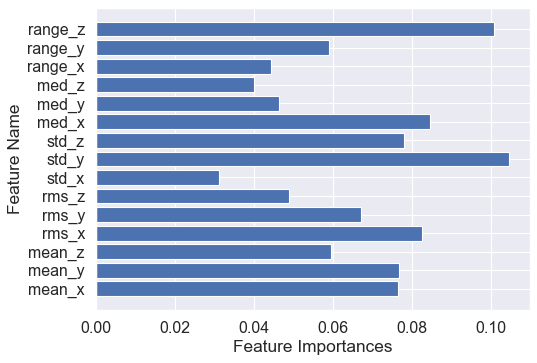

Feature importances: [0.08 0.08 0.06 0.08 0.07 0.05 0.03 0.1  0.08 0.08 0.05 0.04 0.04 0.06
 0.1 ]


In [66]:
# adspy_shared_utilities import plot_feature_importances
# Atturibute Feature importances only use for classifiers contain trees

feature_names = ['mean_x', 'mean_y', 'mean_z', 
                'rms_x', 'rms_y', 'rms_z',
                'std_x', 'std_y', 'std_z',
                'med_x', 'med_y', 'med_z',
                'range_x','range_y','range_z']#'diffState']

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature Name")
    plt.yticks(np.arange(c_features), feature_names)
    
plt.figure(figsize=(7,5), dpi=80)
plot_feature_importances(clf4, feature_names)
plt.show()

print('Feature importances: {}'.format(clf4.feature_importances_))

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
      
y_pred = clf4.predict(test_features)

print('micro')
f1_score(test_label, y_pred, average='micro')
recall_score(test_label, y_pred, average='micro')
precision_score(test_label, y_pred, average='micro',labels=np.unique(y_pred))

#overall measurement
print('macro')
f1_score(test_label, y_pred, average='macro')
recall_score(test_label, y_pred, average='macro')
precision_score(test_label, y_pred, average='macro',labels=np.unique(y_pred))

micro


1.0

1.0

1.0

macro


1.0

1.0

1.0

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
      
y_pred1 = clf1.predict(test_features)
y_pred2 = clf3.predict(test_features)
y_pred3 = clf4.predict(test_features)
y_pred4 = knn.predict(test_features)

#overall measurement
print('macro')
recall_score(test_label, y_pred1, average='macro')
recall_score(test_label, y_pred2, average='macro')
recall_score(test_label, y_pred3, average='macro')
recall_score(test_label, y_pred4, average='macro')

macro


0.9963768115942029

0.9916666666666667

1.0

0.9916666666666667

Confusion matrix, without normalization
[[137   0   0   0]
 [  0 101   0   0]
 [  0   0  30   0]
 [  0   0   0  69]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


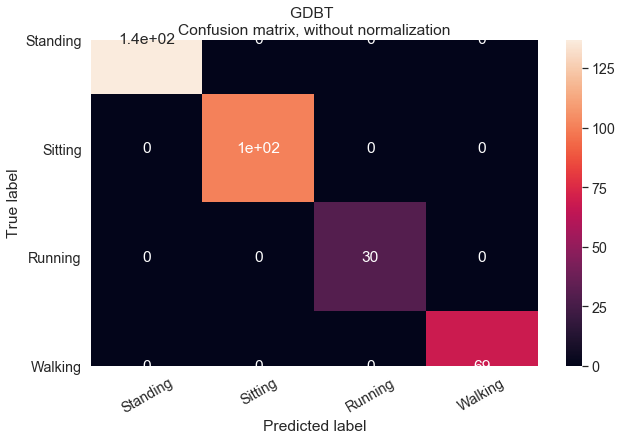

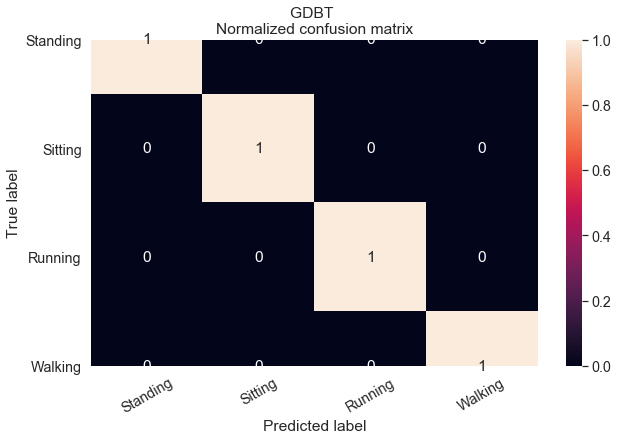


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        69

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337



In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

target_names = ['Standing', 'Sitting', 'Running', 'Walking']

y_pred = clf4.predict(test_features)
lables = np.concatenate([target_names, ])

from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
    
    fig, ax = plt.subplots(figsize = (10,6))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    sb.heatmap(dataFrame, annot = True)  
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

    sb.set(font_scale = 1.3)

np.set_printoptions(precision=2) #lam tron

plot_confusion_matrix(test_label, y_pred, classes=lables,  
        title='GDBT \nConfusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_label, y_pred, classes=lables, normalize=True,
        title='GDBT \nNormalized confusion matrix')

plt.show()
print ("\nClassification Report: ")
print (classification_report(test_label, y_pred,labels=np.unique(y_pred)))


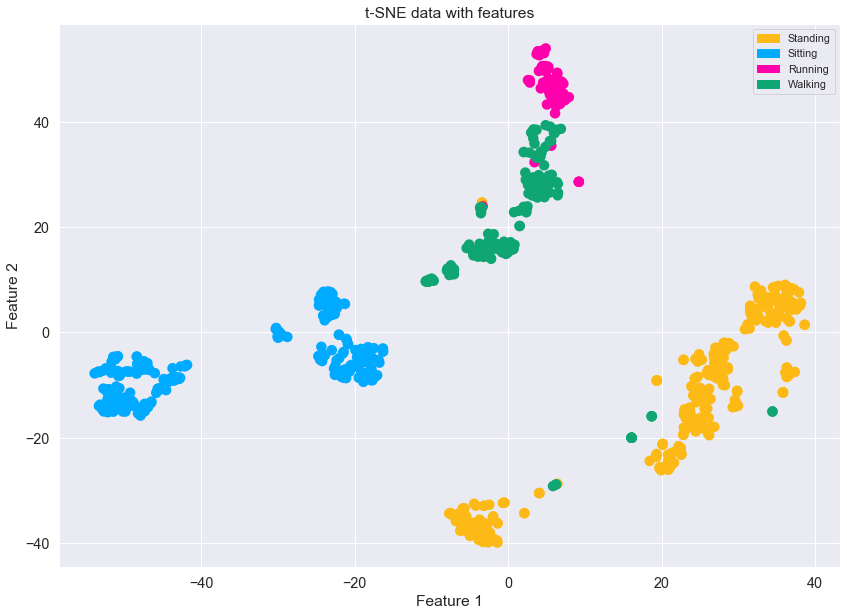

In [19]:
# t-SNE 

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    #print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    
    colors = ['#fdb915', '#00AAFF', '#FF00AA','#10a674'] 
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(14,10))
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=1, lw=5)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE data with features')

    plt.show()
    
X_visual = train_features
y_visual = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 # number of NEAREST NEIGHBORS that used in other MALIFOLD LEARNING algorithm (value: 5-50)
RS = 1000   

from sklearn.manifold import TSNE
# fit X_visual into embedding space in low-dimensional space and return  array (n_samples, n_components) 
X_tsne = TSNE(random_state=RS, n_components=2, perplexity=30.0, learning_rate=300.0 ).fit_transform(X_visual)
#              
plot_labelled_scatter(X_tsne, y_visual,['Standing','Sitting','Running','Walking'])

In [20]:
# tsne for orginal data
# instead train_features by train_data

new_train = np.array(train_data[0])
for i in range(1, len(train_data)):
    new_train = np.concatenate((new_train,np.array(train_data[i])))
new_train
len(new_train)
new_train.shape

array([[ 0.  ,  0.  ,  1.01],
       [-0.21,  0.  ,  1.  ],
       [-0.19,  0.  ,  1.  ],
       ...,
       [-0.93,  0.22, -0.13],
       [-0.96,  0.13, -0.15],
       [-0.96,  0.1 , -0.13]])

306150

(306150, 3)

In [21]:
#new_train = np.resize(new_train,((78646, 18)))
new_train = np.resize(new_train,(train_features.shape))

new_train.shape


(774, 15)

4


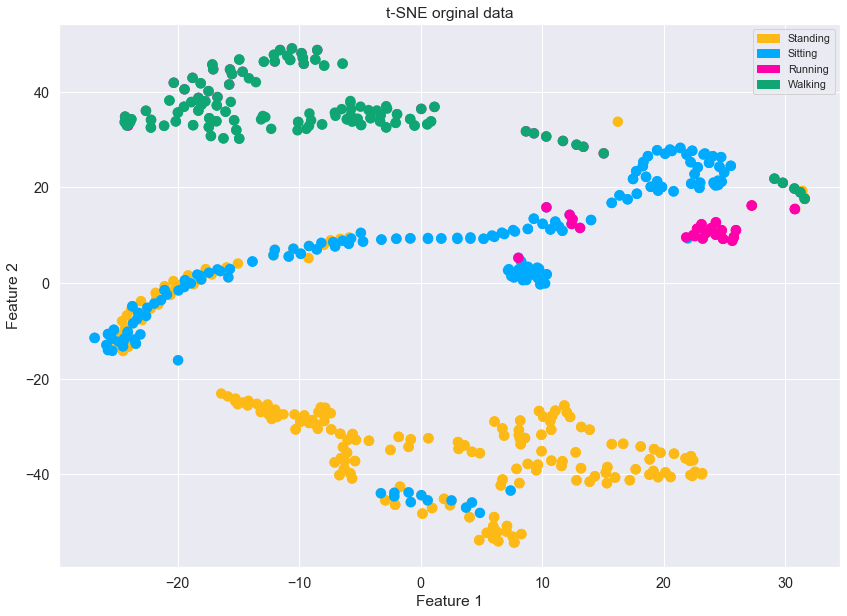

In [22]:
# t-SNE orginal data

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # min & max for feature 1 ((column 0)) 
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # min & max for feature 2 (column 1)
    
    colors = ['#fdb915', '#00AAFF', '#FF00AA', '#10a674']
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(14, 10))
    
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=1, lw=5)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE orginal data')

    plt.show()
    
X_orginal = new_train
y_orginal = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 
RS = 1000   

from sklearn.manifold import TSNE 
X_tsne = TSNE(random_state=RS, n_components=2, perplexity=30.0, learning_rate=300.0 ).fit_transform(X_orginal)    
#, n_components=2, perplexity=30.0, learning_rate=300.0 
plot_labelled_scatter(X_tsne, y_visual,['Standing','Sitting','Running','Walking'])

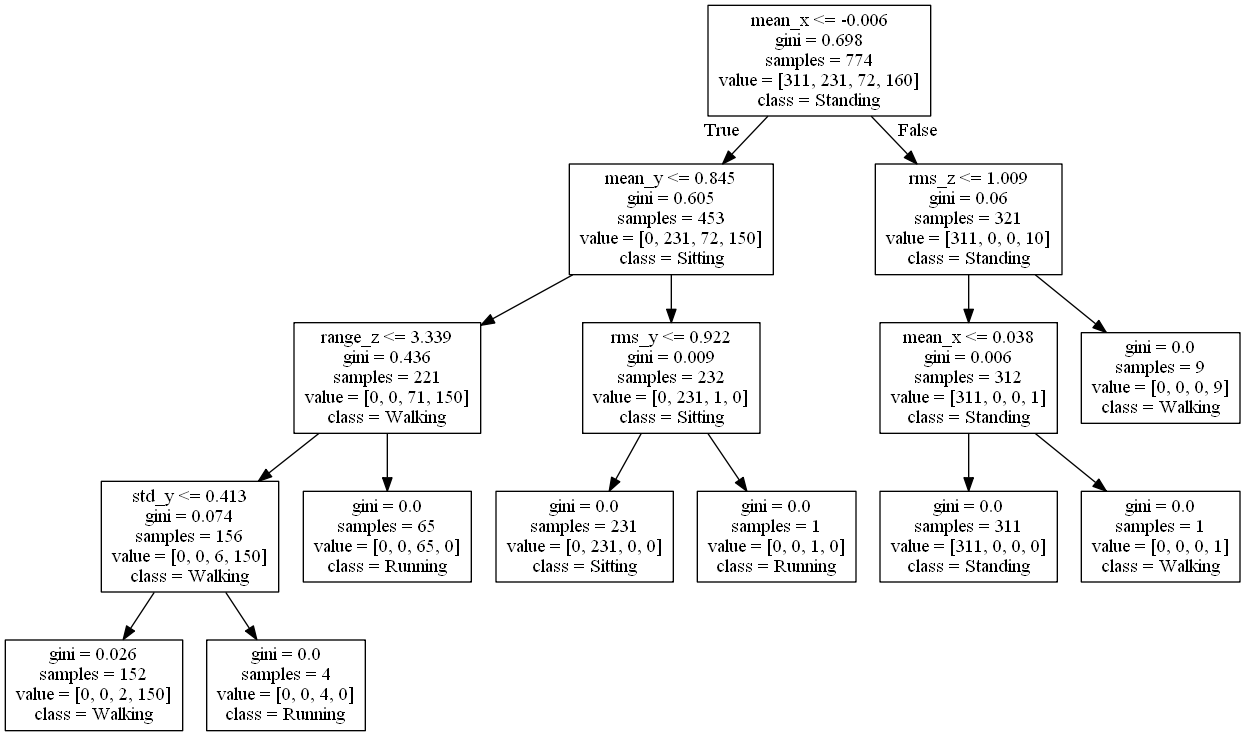

True

In [23]:
#Visualize A Decision Tree
#https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
import graphviz
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from IPython.display import Image
from sklearn import tree
import pydotplus

import os
os.environ["PATH"] += os.pathsep + r'F:\Python file\Graphviz\bin'
# Create DOT data
dot_data = tree.export_graphviz(clf2, out_file=None,
                               feature_names = feature_names,
                               class_names = target_names)
# Draw graph                               
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph                            
Image(pydot_graph.create_png()) 

#Create png
pydot_graph.write_pdf("tree.pdf")

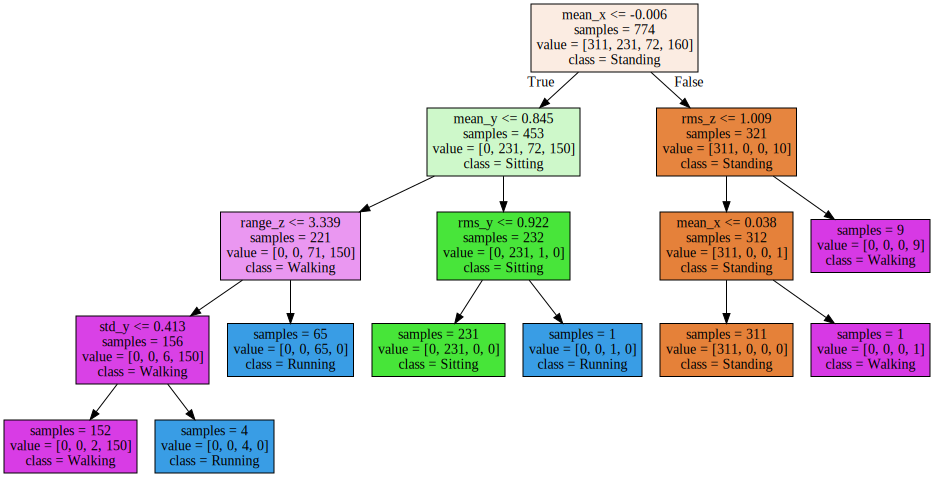

In [24]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

plot_decision_tree(clf2, feature_names, target_names)
#Image(graph.create_png())

In [25]:
tree.export_graphviz(clf2, out_file="tree.png", feature_names=feature_names, class_names=target_names, filled=True, rounded=True)

In [26]:
# Save DT into pdf file 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz


from sklearn.tree import export_graphviz
export_graphviz(clf2, out_file="tree.dot",feature_names=feature_names,class_names=target_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.render()

'Source.gv.pdf'